## Data Analysis and PreProcessing

This notebook demonstrates the analysis and preprocessing of the data provided for task **Gravitational Lens Finding for dark matter**

### WorkFlow
- Extract the data from `.tgz` file using `tarfile`
- Read and Plot the Data form `.fits` file using `astropy` library
- Plot histogram of `is_lens` to know the imablance of target
- Saved the images as npy file and append its path in `classifications.csv`


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
from tqdm import tqdm
import os
import glob
import cv2
import shutil

In [2]:
# Importing astronomical libraries
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename

plt.style.use(astropy_mpl_style)

In [3]:
os.mkdir('/kaggle/working/DeepLense')
os.mkdir('/kaggle/working/DeepLense/images')

In [4]:
# Opening .tgz file and saving it in kaggle working directory
file = tarfile.open('/kaggle/input/deepleanse-2/lens_finding.tgz')
file.extractall('/kaggle/working')
file.close()

In [5]:
# Reading classification_csv and adding one extra column to store the path of generated png image
classification_csv = pd.read_csv('/kaggle/working/SpaceBasedTraining/classifications.csv')
classification_csv['image_path'] = '.'
classification_csv.head(10)

,ID,is_lens,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma,image_path
0,100000,1,8.633760e-10,171,195.429,.
1,100001,1,1.317890e-10,294,855.589,.
2,100002,1,4.877250e-12,140,486.113,.
3,100003,1,1.440160e-09,1500,10467.400,.
4,100004,0,2.197350e-11,0,0.000,.
5,100005,0,2.804930e-10,0,0.000,.
6,100006,0,2.261430e-10,0,0.000,.
7,100007,1,1.466810e-10,213,829.363,.
8,100008,1,5.512840e-11,812,9446.660,.
9,100009,0,1.608170e-09,0,0.000,.


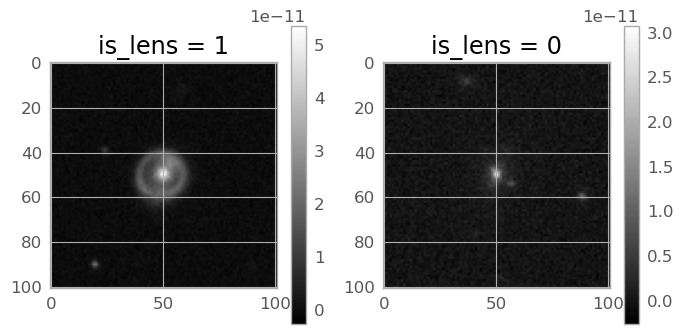

In [6]:
# Loading image from .fits file and plotting it
image_file_1 = get_pkg_data_filename('/kaggle/working/SpaceBasedTraining/files/imageEUC_VIS-100008.fits')
image_file_0 = get_pkg_data_filename('/kaggle/working/SpaceBasedTraining/files/imageEUC_VIS-100009.fits')

image_data_1 = fits.getdata(image_file_1, ext=0)
image_data_0 = fits.getdata(image_file_0, ext=0)

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.subplot(1, 2, 1)
plt.title("is_lens = 1")
plt.imshow(image_data_1, cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title("is_lens = 0")
plt.imshow(image_data_0, cmap='gray')
plt.colorbar()

In [7]:
hdul = fits.open(image_file_1)
hdul.info()

Filename: /kaggle/working/SpaceBasedTraining/files/imageEUC_VIS-100008.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   (101, 101)   float32   


In [8]:
print(image_data_1.shape)

(101, 101)


[]

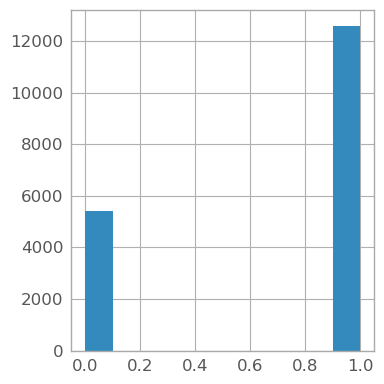

In [9]:
# plotting histogram of is_lens
plt.figure(figsize=(4, 4))
plt.hist(classification_csv['is_lens'])
plt.plot()

In [10]:
classification_csv['is_lens'].value_counts()

1    12574
0     5426
Name: is_lens, dtype: int64

There is little imbalance in data

In [11]:
# Function to load image from .fits file and saving as png 
def fit_to_png(path):
    flag = "Success"
    image_file = get_pkg_data_filename(path)
    image_data = fits.getdata(image_file)
    ID = path.split('/')[5].split('-')[1].split('.')[0]
    save_path = '/kaggle/working/DeepLense/images/'+str(ID)+'.npy'
    image_path = '/kaggle/input/deeplense-2/DeepLense/images/'+str(ID)+'.npy'
    result = np.save(save_path, image_data)
    classification_csv.loc[classification_csv['ID']==int(ID), 'image_path'] = image_path
    if result==False:
        flag = "Error"
    return flag

In [12]:
# Creating list of all fit file
fit_file_paths = glob.glob('/kaggle/working/SpaceBasedTraining/files/*')
len(fit_file_paths)

18000

In [13]:
# Converting all images under fit file into png image
count = 0
for i in tqdm(fit_file_paths):
    res = fit_to_png(i)
    if(res=="Success"):
        count = count+1

100%|██████████| 18000/18000 [04:07<00:00, 72.60it/s]


In [14]:
count

18000

In [15]:
classification_csv.head()

,ID,is_lens,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma,image_path
0,100000,1,8.633760e-10,171,195.429,/kaggle/input/deeplense-2/DeepLense/images/100...
1,100001,1,1.317890e-10,294,855.589,/kaggle/input/deeplense-2/DeepLense/images/100...
2,100002,1,4.877250e-12,140,486.113,/kaggle/input/deeplense-2/DeepLense/images/100...
3,100003,1,1.440160e-09,1500,10467.400,/kaggle/input/deeplense-2/DeepLense/images/100...
4,100004,0,2.197350e-11,0,0.000,/kaggle/input/deeplense-2/DeepLense/images/100...


In [16]:
classification_csv.to_csv('/kaggle/working/DeepLense/classifications.csv', index=False)

In [17]:
shutil.rmtree('/kaggle/working/SpaceBasedTraining')